## 1 Project Overview

As an analyst for Zuber, a new ride-sharing company launching in Chicago, my primary objective is to identify patterns and insights within the available data to enhance the company's understanding of passenger preferences and the influence of external factors on ride frequency. By leveraging data from competitors and analyzing various metrics, I aim to provide actionable recommendations to optimize Zuber's services.

## 2 Initialization

### 2.1 Add imports

Imports in Jupyter notebooks allow users to access external libraries for extended functionality and facilitate code organization by declaring dependencies at the beginning of the notebook, ensuring clear and efficient development.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

1. **Pandas**: Pandas is a Python library used for data manipulation and analysis, offering powerful data structures and operations for working with structured data.

2. **Matplotlib**: Matplotlib is a plotting library for Python that enables the creation of static, animated, and interactive visualizations, providing a wide range of plotting options and customization.

3. **SciPy**: SciPy is a Python library used for scientific and technical computing, built on top of NumPy, offering modules for optimization, integration, interpolation, linear algebra, and more, supporting a broad range of scientific applications.

### 2.2 Set up CSV DataFrames

In my Jupyter notebook, I use Pandas to load CSV files, enabling me to manipulate and analyze data seamlessly within the notebook environment.

In [2]:
local = {
    'cabs': './dataset/moved_project_sql_result_01.csv', 
    'neighborhoods': './dataset/moved_project_sql_result_04.csv',
    'trips': './dataset/moved_project_sql_result_07.csv'
}
server_path = {
    'cabs': '/datasets/project_sql_result_01.csv',
    'neighborhoods': '/datasets/project_sql_result_04.csv',
    'trips': '/datasets/project_sql_result_07.csv'
}
online = {
    'cabs': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%206/dataset/moved_project_sql_result_01.csv',
    'neighborhoods': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%206/dataset/moved_project_sql_result_04.csv',
    'trips': 'https://raw.githubusercontent.com/alexcoy06/Data-Science/main/Project%206/dataset/moved_project_sql_result_07.csv'
}

I use `local` to store paths to datasets on my local machine, `server_path` for paths on a server, and `online` for any remote dataset locations I might need.

In [3]:
def load_data(set):
    try:
        df = pd.read_csv(local[set])
    except FileNotFoundError:
        try:
            df = pd.read_csv(server_path[set])
        except FileNotFoundError:
            df = pd.read_csv(online[set])
    return df

I define the `load_data` function to load a dataset specified by the argument `set`. First, I attempt to read it locally from `local[set]`, handling a `FileNotFoundError` by trying to read from `server_path[set]` if necessary, and finally, from `online[set]` if all else fails.set up the function for the correct path. 

In [4]:
cabs = load_data('cabs')
neighborhoods = load_data('neighborhoods')
trips = load_data('trips')

I use `load_data('cabs')` to load the 'cabs' dataset, `load_data('neighborhoods')` for the 'neighborhoods' dataset, and `load_data('trips')` for the 'trips' dataset, ensuring each dataset is loaded correctly based on its specified source (local, server, or online).

## 3 Preparing the Data

### 3.1 Inspect `cabs`

I will now proceed to examine the `cabs` data frame.

In [5]:
cabs

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


Initially, everything seems to be in order.

In [6]:
cabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Everything appears to be accurate and the data types align with our expectations.

In [7]:
cabs_missing = cabs.isna().sum()
cabs_dupl = cabs.duplicated().sum()
print(f'Number of missing values:\n{cabs_missing}\n\nNumber of duplicated rows:\n{cabs_dupl}')

Number of missing values:
company_name    0
trips_amount    0
dtype: int64

Number of duplicated rows:
0


Upon further inspection, everything checks out.

### 3.2 Inspect `neighborhoods`

I will now proceed to examine the `neighborhoods` data frame.

In [8]:
neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


Again, everything seems to be in order.

In [9]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Everything appears to be accurate and the data types align with our expectations. 

In [10]:
neighborhoods_missing = neighborhoods.isna().sum()
neighborhoods_dupl = neighborhoods.duplicated().sum()
print(f'Number of missing values:\n{neighborhoods_missing}\n\nNumber of duplicated rows:\n{neighborhoods_dupl}')

Number of missing values:
dropoff_location_name    0
average_trips            0
dtype: int64

Number of duplicated rows:
0


Upon further inspection, everything checks out.

### 3.3 Inspect 'trips'

I will now proceed to examine the `trips` data frame.

In [11]:
trips

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


Again, everything seems to be in order.

In [12]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


It seems that `start_ts` has an incorrect data type; it should be dates.

In [13]:
trips['start_ts'] = pd.to_datetime(trips['start_ts'], format="%Y-%m-%d %H:%M:%S")
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Now, `start_ts` has been corrected to have the appropriate data type.

In [14]:
trip_missing = trips.isna().sum()
trip_dupl = trips.duplicated().sum()
print(f'Number of missing values:\n{trip_missing}\n\nNumber of duplicated rows:\n{trip_dupl}')

Number of missing values:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

Number of duplicated rows:
197


There do seem to be some duplicate values.

In [15]:
trips_dupl_names = trips[trips.duplicated(keep=False)].sort_values(by='start_ts')
trips_dupl_names

,start_ts,weather_conditions,duration_seconds
541,2017-11-04 05:00:00,Good,1200.0
462,2017-11-04 05:00:00,Good,1200.0
682,2017-11-04 06:00:00,Good,1267.0
681,2017-11-04 06:00:00,Good,1267.0
363,2017-11-04 07:00:00,Good,1440.0
...,...,...,...
831,2017-11-25 11:00:00,Good,1680.0
1058,2017-11-25 12:00:00,Good,1440.0
255,2017-11-25 12:00:00,Good,1380.0
53,2017-11-25 12:00:00,Good,1380.0


It's not problematic since it only counts by the hour, and it's reasonable to expect that a third of the rides might involve people traveling to and from similar areas.

## 4 Data Analysis

### 4.1 Task 1

We want to evaluate the top drop-off locations.

In [16]:
neighborhoods_top = neighborhoods.iloc[:10]
neighborhoods_top

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Upon further inspection, it appears that many of these top drop-off locations are concentrated in densely populated downtown areas.

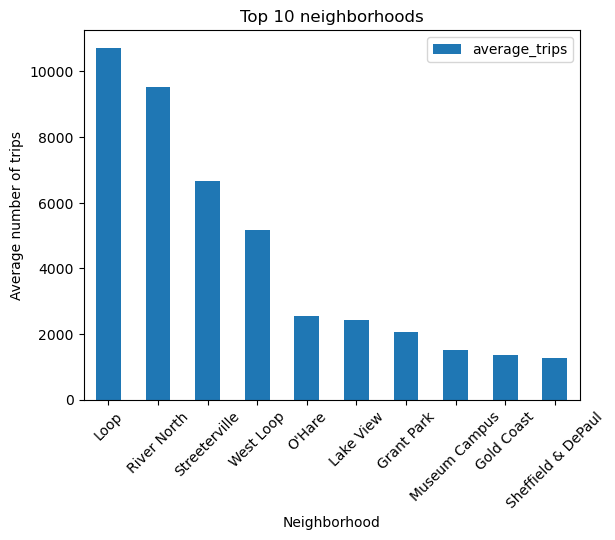

In [17]:
neighborhoods_top.plot(
    kind='bar',
    x='dropoff_location_name', 
    y='average_trips',
    xlabel='Neighborhood', 
    ylabel='Average number of trips',
    title='Top 10 neighborhoods'
)
plt.xticks(rotation=45)
plt.show()

Clearly, Loop, River North, Streeterville, and West Loop are the most common areas to visit. The remaining top ten neighborhoods each have around 2000 trips, show more balanced distribution.

### 4.2 Task 2

Now we would like to identify the top 10 companies in the market.

In [18]:
cabs_top = cabs.iloc[:10]
cabs_top

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


There seems to be a significant variance in distribution among the various companies, with Flash Cab leading at the top.

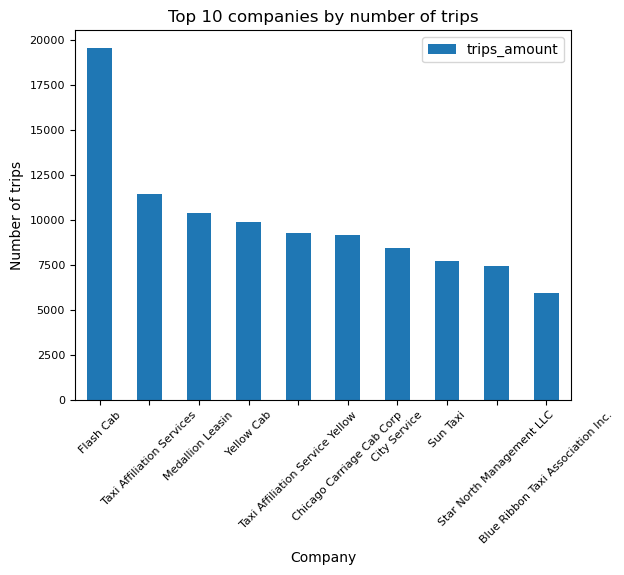

In [19]:
cabs_top.plot(
    kind='bar',
    x='company_name', 
    y='trips_amount',
    xlabel='Company', 
    ylabel='Number of trips',
    title='Top 10 companies by number of trips',
    fontsize=8
)
plt.xticks(rotation=45)
plt.show()

As mentioned earlier, the most noticeable variance and deviation exist between the top company, Flash Cab, and the rest of the companies.

### 4.3 Overall Analysis

- Demand Concentration: The highest demand for drop-offs is concentrated in downtown areas such as the Loop and River North, indicating these are major centers of activity.
- Market Dynamics: The taxi market is competitive with Flash Cab being the leader, but several other companies also maintain significant market shares, suggesting a diversified service landscape.

## 5 Hypothesis 

Null Hypothesis (H₀): The average duration of rides from the Loop to O'Hare International Airport is the same on rainy and non-rainy Saturdays.

Alternative Hypothesis (H₁): The average duration of rides from the Loop to O'Hare International Airport differs on rainy and non-rainy Saturdays.

In [20]:
good_conditions = trips[trips['weather_conditions'] == 'Good']
bad_conditions = trips[trips['weather_conditions'] != 'Good']

result = st.ttest_ind(good_conditions['duration_seconds'], bad_conditions['duration_seconds'])
alpha = 0.05

if result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in average ride durations between rainy and non-rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude a difference in average ride durations between rainy and non-rainy Saturdays.")

Reject the null hypothesis: There is a significant difference in average ride durations between rainy and non-rainy Saturdays.


This suggests there is sufficient evidence to conclude that the average ride durations differ significantly between these weather conditions.

## 6 Conclusion

Based on Chicago's competitive taxi market led by Flash Cab and concentrated demand in downtown areas like the Loop and River North, Zuber can differentiate itself by optimizing service based on weather-influenced ride durations and passenger preferences. This strategy positions Zuber to effectively compete and capture market share in Chicago's dynamic transportation landscape.